In [1]:
using Pkg
# This should be a folder where you want to store the Julia project
Pkg.activate("InPlaceDemo")
Pkg.add(url = "https://github.com/JaneliaSciComp/MatrixMicroscopeUtils.jl#main")
Pkg.add("ImageView")
Pkg.add("ImageShow")
Pkg.add("HDF5")
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("FixedPointNumbers")
Pkg.add("PyCall")
Pkg.status()

      Status `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Project.toml`
  [53c48c17] FixedPointNumbers v0.8.4
  [f67ccb44] HDF5 v0.16.4
  [6218d12a] ImageMagick v1.2.1
  [4e3cecfd] ImageShow v0.3.3
  [86fae568] ImageView v0.10.15
  [916415d5] Images v0.25.1
  [24e7d267] MatrixMicroscopeUtils v0.4.1 `https://github.com/JaneliaSciComp/MatrixMicroscopeUtils.jl#main#main`
  [438e738f] PyCall v1.93.1


  Activating project at `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo`
    Updating git-repo `https://github.com/JaneliaSciComp/MatrixMicroscopeUtils.jl#main`
    Updating registry at `C:\Users\kittisopikulm\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Project.toml`
  No Changes to `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Project.toml`
  No Changes to `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Project.toml`
  No Changes to `C:\Users\kittisopikulm\Documents\Julia\InPlaceDemo\InPlaceDemo\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\kittisopikulm\Doc

In [2]:
using MatrixMicroscopeUtils
using MatrixMicroscopeUtils.MatrixBinaryTemplates
using HDF5
using Images
using ImageShow
using ImageView
using ImageMagick
const utils = MatrixMicroscopeUtils
const BinaryTemplates = MatrixMicroscopeUtils.MatrixBinaryTemplates

MatrixMicroscopeUtils

In [3]:
 cd(raw"\\Keller-S10\Data\Matrix\22-03-10\_20220310_110256(header 2048)")

In [4]:
stacks = filter(endswith(".stack"), readdir())

22-element Vector{String}:
 "TM0000000_CM2.stack"
 "TM0000044_CM2.stack"
 "TM0000088_CM2.stack"
 "TM0000132_CM2.stack"
 "TM0000176_CM2.stack"
 "TM0000220_CM2.stack"
 "TM0000264_CM2.stack"
 "TM0000308_CM2.stack"
 "TM0000352_CM2.stack"
 "TM0000396_CM2.stack"
 "TM0000440_CM2.stack"
 "TM0000484_CM2.stack"
 "TM0000528_CM2.stack"
 "TM0000572_CM2.stack"
 "TM0000616_CM2.stack"
 "TM0000660_CM2.stack"
 "TM0000704_CM2.stack"
 "TM0000748_CM2.stack"
 "TM0000792_CM2.stack"
 "TM0000836_CM2.stack"
 "TM0000880_CM2.stack"
 "TM0000924_CM2.stack"

In [5]:
# Backup the stacks

mkpath("backup")
for stack in stacks
    try
        backup_file = joinpath("backup", stack)
        if !isfile(backup_file)
            cp(stack, backup_file)
        end
    catch err
        println(err)
    end
end
println("Backed up stacks:")
filter(endswith(".stack"), readdir("backup"))

Backed up stacks:


22-element Vector{String}:
 "TM0000000_CM2.stack"
 "TM0000044_CM2.stack"
 "TM0000088_CM2.stack"
 "TM0000132_CM2.stack"
 "TM0000176_CM2.stack"
 "TM0000220_CM2.stack"
 "TM0000264_CM2.stack"
 "TM0000308_CM2.stack"
 "TM0000352_CM2.stack"
 "TM0000396_CM2.stack"
 "TM0000440_CM2.stack"
 "TM0000484_CM2.stack"
 "TM0000528_CM2.stack"
 "TM0000572_CM2.stack"
 "TM0000616_CM2.stack"
 "TM0000660_CM2.stack"
 "TM0000704_CM2.stack"
 "TM0000748_CM2.stack"
 "TM0000792_CM2.stack"
 "TM0000836_CM2.stack"
 "TM0000880_CM2.stack"
 "TM0000924_CM2.stack"

In [6]:
# Note that the metadata now contains the header_size and timepoints_per_stack
m = utils.metadata("TM0000000_CM2.stack")

MatrixMetadata with the following field values.
                   version: 1.0
          software_version: 1.0.02617
               data_header: 
             specimen_name: sample
               tile_XYZ_um: (X = -280.0, Y = 0.0, Z = 0.0)
           sampling_XYZ_um: (X = 0.34375, Y = 0.34375, Z = 3.437)
                    roi_XY: (left = 2304, top = 4608, width = 888, height = 1704)
                   channel: 1
             wavelength_nm: 488.0
               laser_power: (percent = 0.0, mW = 0.0)
    frame_exposure_time_ms: 1.33
          detection_filter: test
            dimensions_XYZ: (X = 2304, Y = 816, Z = 17)
           stack_direction: +Z
                    planes: 1:17
                timepoints: 936
                 bit_depth: 12
         defect_correction: off
          experiment_notes: 
                       cam: 2
               header_size: 2048
      timepoints_per_stack: 44
             metadata_file: cam2.xml


In [7]:
uint8_template = get_template(m) # Byte based template, useful for applications that want a raw byte stream
uint24_template = get_uint24_template(m) # 24-bit integers (two 12-bit integers), multiple of a byte

MatrixMicroscopeUtils.BinaryTemplates.BinaryTemplate:
    expected_file_size: 1.965 GiB

    Offsets            Length     Chunk Checksum
    ------------------ ---------- --------------
    0x0000000000000000       2048     0x8944066b
    0x0000000005b72000       2048     0xf9096ff3
    0x000000000e49d000       2048     0x8a2fda33
    0x0000000019b81000       2048     0x3eb1aa0d
    0x000000001f6f3000       2048     0x232f0606
    0x000000002add7000       2048     0x00ecf657
    0x0000000033702000       2048     0x783a8e47
    0x000000003ede6000       2048     0xb13e197f
    0x0000000047711000       2048     0x422b3352
    0x0000000052df5000       2048     0x559dc2c5
    0x000000005b720000       2048     0xea0b0d83
    0x0000000066e04000       2048     0x4c00f92c
    0x000000006f72f000       2048     0x3e135ed5
    0x000000007ae13000       2048     0x045fc5c4
    0x000000007dbcc000          0     0x00000000


In [8]:
HDF5.ishdf5("TM0000000_CM2.stack")

false

In [9]:
backup_template = apply_template("TM0000000_CM2.stack", uint24_template)

MatrixMicroscopeUtils.BinaryTemplates.BinaryTemplate:
    expected_file_size: 1.965 GiB

    Offsets            Length     Chunk Checksum
    ------------------ ---------- --------------
    0x0000000000000000       2048     0xa489834f
    0x0000000005b72000       2048     0xa489834f
    0x000000000e49d000       2048     0xa489834f
    0x0000000019b81000       2048     0xa489834f
    0x000000001f6f3000       2048     0xa489834f
    0x000000002add7000       2048     0xa489834f
    0x0000000033702000       2048     0xa489834f
    0x000000003ede6000       2048     0xa489834f
    0x0000000047711000       2048     0xa489834f
    0x0000000052df5000       2048     0xa489834f
    0x000000005b720000       2048     0xa489834f
    0x0000000066e04000       2048     0xa489834f
    0x000000006f72f000       2048     0xa489834f
    0x000000007ae13000       2048     0xa489834f
    0x000000007dbcc000          0     0x00000000


In [10]:
HDF5.ishdf5("TM0000000_CM2.stack")

true

In [11]:
# The initial template has no groups and no metadata
h5open("TM0000000_CM2.stack", "r") do h5f
    display(h5f)
end

🗂️ HDF5.File: (read-only) TM0000000_CM2.stack
├─ 🔢 TM0000000
├─ 🔢 TM0000001
├─ 🔢 TM0000002
├─ 🔢 TM0000003
├─ 🔢 TM0000004
├─ 🔢 TM0000005
├─ 🔢 TM0000006
├─ 🔢 TM0000007
├─ 🔢 TM0000008
├─ 🔢 TM0000009
├─ 🔢 TM0000010
├─ 🔢 TM0000011
├─ 🔢 TM0000012
├─ 🔢 TM0000013
├─ 🔢 TM0000014
├─ 🔢 TM0000015
├─ 🔢 TM0000016
├─ 🔢 TM0000017
├─ 🔢 TM0000018
├─ 🔢 TM0000019
├─ 🔢 TM0000020
├─ 🔢 TM0000021
├─ 🔢 TM0000022
├─ 🔢 TM0000023
├─ 🔢 TM0000024
├─ 🔢 TM0000025
├─ 🔢 TM0000026
├─ 🔢 TM0000027
├─ 🔢 TM0000028
├─ 🔢 TM0000029
├─ 🔢 TM0000030
├─ 🔢 TM0000031
├─ 🔢 TM0000032
├─ 🔢 TM0000033
├─ 🔢 TM0000034
├─ 🔢 TM0000035
├─ 🔢 TM0000036
├─ 🔢 TM0000037
├─ 🔢 TM0000038
├─ 🔢 TM0000039
├─ 🔢 TM0000040
├─ 🔢 TM0000041
├─ 🔢 TM0000042
└─ 🔢 TM0000043

In [12]:
# Group the datasets and add attributes to the group
h5open("TM0000000_CM2.stack", "r+") do h5f
    g = MatrixBinaryTemplates.group_datasets(h5f, "CM$(m.cam)")
    utils.write_cam_metadata_to_hdf5(g, m)
    display(h5f)
end

🗂️ HDF5.File: (read-write) TM0000000_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000000
   ├─ 🔢 TM0000001
   └─ (42 more children)

In [13]:
A = h5open("TM0000000_CM2.stack", "r") do h5f
    h5f["CM2/TM0000000"][]
end
A

1152×816×17 Array{UInt32, 3}:
[:, :, 1] =
 0x000d10d2  0x000e40e0  0x000e50d7  …  0x000d50cb  0x000d00c6  0x000cd0c9
 0x000e00e0  0x001430ce  0x000e30dc     0x000ca0d7  0x000c80cf  0x000db0c6
 0x000d30cb  0x000d50d5  0x001650d0     0x000d50c9  0x000e20ce  0x000cf0c2
 0x001090f4  0x000d20d5  0x000d50eb     0x000cf0d4  0x000cc0c9  0x000da0c2
 0x000de0d8  0x000d30e8  0x000e10dc     0x000c10c9  0x000dc0d3  0x000cb0d8
 0x000c90e4  0x000e50dd  0x000e20d9  …  0x000fa0bb  0x000d80d2  0x000f40c4
 0x000df0dc  0x000cf0f1  0x000de0da     0x000e30c8  0x000cd0d7  0x000c40bc
 0x000d50d6  0x000cc0e1  0x000d30d5     0x000d20d8  0x000c60c9  0x000d70c9
 0x000c70d2  0x000c70dd  0x000d8161     0x000ca0d4  0x000cc0c8  0x000d40cb
 0x000e10df  0x000d40dc  0x000e00e1     0x000da0d1  0x000cf0c8  0x000cf0d0
 0x000d30d5  0x000db0dc  0x000d80dc  …  0x000c90c0  0x000ca0cb  0x000c40dd
 0x000d40f0  0x000d90dd  0x000de0ed     0x000ce0de  0x000ce0c1  0x000c60c0
 0x000c70d8  0x000e60e4  0x000c40d8     0x000c90be  0x000c

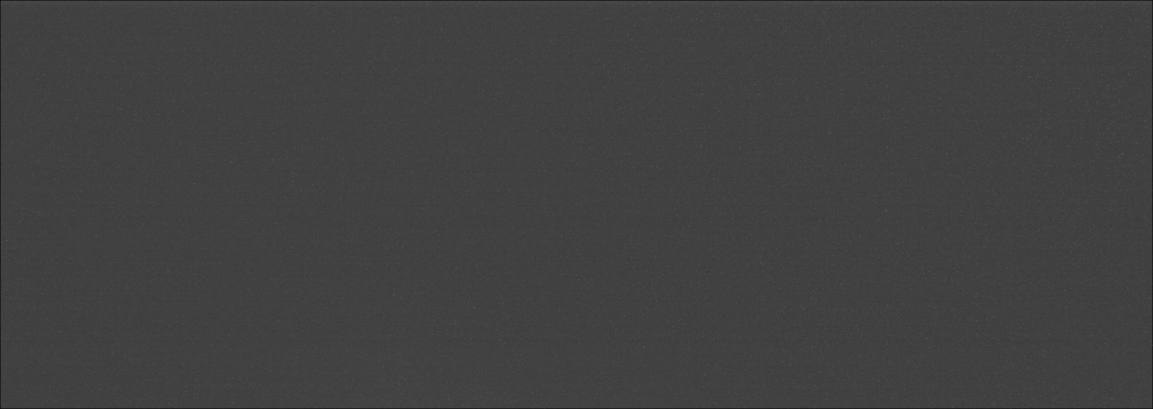

In [14]:
A12 = Array{UInt16}(undef, Tuple(m.dimensions_XYZ))
# Grab the low and hight UInt12 data and interlace them together
A12[1:2:end, :, :] = A .& 0xfff
A12[2:2:end, :, :] = A .>> 12
# Use Gray to display the image
A12_min = minimum(A12)
A12_max = maximum(A12)
# Encode the images as a gray level image for display
G = Gray.((A12 .- A12_min) ./ (A12_max .- A12_min)) # Scale A12 between minimum and maximum for linear contrast
G[:,:,1]'

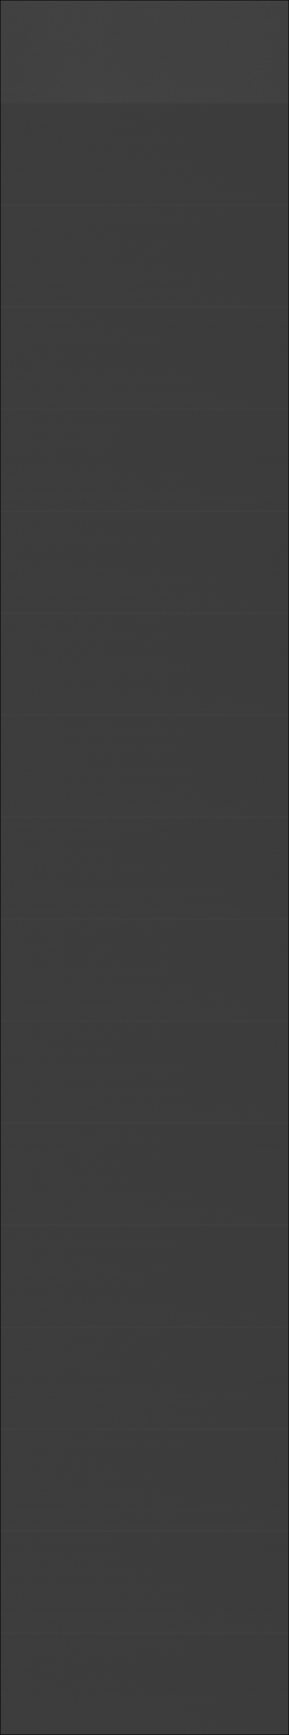

In [15]:
# Display all the z-levels in G

mosaicview(permutedims(G, (2,1,3)))

In [16]:
# Reset the fie back to its original state, all safeties off
apply_template("TM0000000_CM2.stack", backup_template; ensure_zero = false, truncate = true)

MatrixMicroscopeUtils.BinaryTemplates.BinaryTemplate:
    expected_file_size: 1.965 GiB

    Offsets            Length     Chunk Checksum
    ------------------ ---------- --------------
    0x0000000000000000       2048     0x5c025152
    0x0000000005b72000       2048     0xf9096ff3
    0x000000000e49d000       2048     0x8a2fda33
    0x0000000019b81000       2048     0x3eb1aa0d
    0x000000001f6f3000       2048     0x232f0606
    0x000000002add7000       2048     0x00ecf657
    0x0000000033702000       2048     0x783a8e47
    0x000000003ede6000       2048     0xb13e197f
    0x0000000047711000       2048     0x422b3352
    0x0000000052df5000       2048     0x559dc2c5
    0x000000005b720000       2048     0xea0b0d83
    0x0000000066e04000       2048     0x4c00f92c
    0x000000006f72f000       2048     0x3e135ed5
    0x000000007ae13000       2048     0xb446ce36
    0x000000007dbcc000          0     0x00000000
    0x000000007dbcc000       7728     0x65ef0fb0


In [17]:
HDF5.ishdf5("TM0000000_CM2.stack")

false

In [18]:
# We can apply the same template the next timepoint file
backup_template44 = apply_template("TM0000044_CM2.stack", uint24_template; truncate = true, ensure_zero = false)

MatrixMicroscopeUtils.BinaryTemplates.BinaryTemplate:
    expected_file_size: 1.965 GiB

    Offsets            Length     Chunk Checksum
    ------------------ ---------- --------------
    0x0000000000000000       2048     0xa489834f
    0x0000000005b72000       2048     0xa489834f
    0x000000000e49d000       2048     0xa489834f
    0x0000000019b81000       2048     0xa489834f
    0x000000001f6f3000       2048     0xa489834f
    0x000000002add7000       2048     0xa489834f
    0x0000000033702000       2048     0xa489834f
    0x000000003ede6000       2048     0xa489834f
    0x0000000047711000       2048     0xa489834f
    0x0000000052df5000       2048     0xa489834f
    0x000000005b720000       2048     0xa489834f
    0x0000000066e04000       2048     0xa489834f
    0x000000006f72f000       2048     0xa489834f
    0x000000007ae13000       2048     0xa489834f
    0x000000007dbcc000          0     0x00000000


In [19]:
# But the timepoint names will not be correct
h5open("TM0000044_CM2.stack", "r") do h5f
    display(h5f)
end

🗂️ HDF5.File: (read-only) TM0000044_CM2.stack
├─ 🔢 TM0000000
├─ 🔢 TM0000001
├─ 🔢 TM0000002
├─ 🔢 TM0000003
├─ 🔢 TM0000004
├─ 🔢 TM0000005
├─ 🔢 TM0000006
├─ 🔢 TM0000007
├─ 🔢 TM0000008
├─ 🔢 TM0000009
├─ 🔢 TM0000010
├─ 🔢 TM0000011
├─ 🔢 TM0000012
├─ 🔢 TM0000013
├─ 🔢 TM0000014
├─ 🔢 TM0000015
├─ 🔢 TM0000016
├─ 🔢 TM0000017
├─ 🔢 TM0000018
├─ 🔢 TM0000019
├─ 🔢 TM0000020
├─ 🔢 TM0000021
├─ 🔢 TM0000022
├─ 🔢 TM0000023
├─ 🔢 TM0000024
├─ 🔢 TM0000025
├─ 🔢 TM0000026
├─ 🔢 TM0000027
├─ 🔢 TM0000028
├─ 🔢 TM0000029
├─ 🔢 TM0000030
├─ 🔢 TM0000031
├─ 🔢 TM0000032
├─ 🔢 TM0000033
├─ 🔢 TM0000034
├─ 🔢 TM0000035
├─ 🔢 TM0000036
├─ 🔢 TM0000037
├─ 🔢 TM0000038
├─ 🔢 TM0000039
├─ 🔢 TM0000040
├─ 🔢 TM0000041
├─ 🔢 TM0000042
└─ 🔢 TM0000043

In [20]:
# I created a tool to rename the datasets appropriately
MatrixBinaryTemplates.translate_datasets("TM0000044_CM2.stack", 44)
# Group them and add metadata
h5open("TM0000044_CM2.stack", "r+") do h5f
    display(h5f)
    g = MatrixBinaryTemplates.group_datasets(h5f, "CM$(m.cam)")
    utils.write_cam_metadata_to_hdf5(g, m)
    display(h5f)
end

🗂️ HDF5.File: (read-write) TM0000044_CM2.stack
├─ 🔢 TM0000044
├─ 🔢 TM0000045
├─ 🔢 TM0000046
├─ 🔢 TM0000047
├─ 🔢 TM0000048
├─ 🔢 TM0000049
├─ 🔢 TM0000050
├─ 🔢 TM0000051
├─ 🔢 TM0000052
├─ 🔢 TM0000053
├─ 🔢 TM0000054
├─ 🔢 TM0000055
├─ 🔢 TM0000056
├─ 🔢 TM0000057
├─ 🔢 TM0000058
├─ 🔢 TM0000059
├─ 🔢 TM0000060
├─ 🔢 TM0000061
├─ 🔢 TM0000062
├─ 🔢 TM0000063
├─ 🔢 TM0000064
├─ 🔢 TM0000065
├─ 🔢 TM0000066
├─ 🔢 TM0000067
├─ 🔢 TM0000068
├─ 🔢 TM0000069
├─ 🔢 TM0000070
├─ 🔢 TM0000071
├─ 🔢 TM0000072
├─ 🔢 TM0000073
├─ 🔢 TM0000074
├─ 🔢 TM0000075
├─ 🔢 TM0000076
├─ 🔢 TM0000077
├─ 🔢 TM0000078
├─ 🔢 TM0000079
├─ 🔢 TM0000080
├─ 🔢 TM0000081
├─ 🔢 TM0000082
├─ 🔢 TM0000083
├─ 🔢 TM0000084
├─ 🔢 TM0000085
├─ 🔢 TM0000086
└─ 🔢 TM0000087

🗂️ HDF5.File: (read-write) TM0000044_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000044
   ├─ 🔢 TM0000045
   └─ (42 more children)

In [21]:
# Python can also access the data

using PyCall
py"""
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
B = None
print(os.getcwd())
with h5py.File("TM0000044_CM2.stack") as h5f:
    for key in h5f["CM2"].keys():
        print(key)
    A = h5f["CM2/TM0000044"].astype("uint32")[:]
    B = np.empty((A.shape[0], A.shape[1], A.shape[2]*2), dtype="uint16")
    B[:,:,0::2] = A & 0xff
    B[:,:,1::2] = A >> 12
print(B[0, :, :])
"""

\\Keller-S10\Data\Matrix\22-03-10\_20220310_110256(header 2048)
TM0000044
TM0000045
TM0000046
TM0000047
TM0000048
TM0000049
TM0000050
TM0000051
TM0000052
TM0000053
TM0000054
TM0000055
TM0000056
TM0000057
TM0000058
TM0000059
TM0000060
TM0000061
TM0000062
TM0000063
TM0000064
TM0000065
TM0000066
TM0000067
TM0000068
TM0000069
TM0000070
TM0000071
TM0000072
TM0000073
TM0000074
TM0000075
TM0000076
TM0000077
TM0000078
TM0000079
TM0000080
TM0000081
TM0000082
TM0000083
TM0000084
TM0000085
TM0000086
TM0000087
[[200 199 182 ... 208 227 203]
 [217 207 206 ... 202 212 208]
 [211 208 223 ... 194 215 210]
 ...
 [194 199 194 ... 194 191 197]
 [192 196 195 ... 195 211 200]
 [201 194 201 ... 188 204 187]]


In [22]:
# Restore TM0000044_CM2.stack to its original state
apply_template("TM0000044_CM2.stack", backup_template44; ensure_zero = false, truncate = true)

MatrixMicroscopeUtils.BinaryTemplates.BinaryTemplate:
    expected_file_size: 1.965 GiB

    Offsets            Length     Chunk Checksum
    ------------------ ---------- --------------
    0x0000000000000000       2048     0xf2256e6b
    0x0000000005b72000       2048     0xf9096ff3
    0x000000000e49d000       2048     0xa271d15b
    0x0000000019b81000       2048     0x5bb01ff7
    0x000000001f6f3000       2048     0x232f0606
    0x000000002add7000       2048     0x00ecf657
    0x0000000033702000       2048     0x783a8e47
    0x000000003ede6000       2048     0xb13e197f
    0x0000000047711000       2048     0x422b3352
    0x0000000052df5000       2048     0x559dc2c5
    0x000000005b720000       2048     0xea0b0d83
    0x0000000066e04000       2048     0x4c00f92c
    0x000000006f72f000       2048     0x3e135ed5
    0x000000007ae13000       2048     0xa3bfa48d
    0x000000007dbcc000          0     0x00000000
    0x000000007dbcc000       7772     0x32e05146


In [23]:
HDF5.ishdf5("TM0000044_CM2.stack")

false

In [30]:
# Bulk conversion script with metadata

@time begin
    stacks = filter(endswith(".stack"), readdir())
    uint24_template = get_uint24_template(m) # 24-bit integers (two 12-bit integers), multiple of a byte
    backups = map(stacks) do stack
        # Use a regular expression to match the stacks with the format TM0000000
        regexm = match(r"TM(\d{7})", stack)
        if !isnothing(regexm)
            backup = apply_template(stack, uint24_template; truncate = true)
            tp = parse(Int, first(regexm.captures))
            if tp > 0
                BinaryTemplates.translate_datasets(stack, tp)
            end
            h5open(stack, "r+") do h5f
                g = BinaryTemplates.group_datasets(h5f, "CM$(m.cam)")
                utils.write_cam_metadata_to_hdf5(g, m)
            end
        end
        return backup
    end
    first(backups)
end

  4.674344 seconds (103.20 k allocations: 6.657 MiB, 2.39% compilation time)


MatrixMicroscopeUtils.BinaryTemplates.BinaryTemplate:
    expected_file_size: 1.965 GiB

    Offsets            Length     Chunk Checksum
    ------------------ ---------- --------------
    0x0000000000000000       2048     0xa489834f
    0x0000000005b72000       2048     0xa489834f
    0x000000000e49d000       2048     0xa489834f
    0x0000000019b81000       2048     0xa489834f
    0x000000001f6f3000       2048     0xa489834f
    0x000000002add7000       2048     0xa489834f
    0x0000000033702000       2048     0xa489834f
    0x000000003ede6000       2048     0xa489834f
    0x0000000047711000       2048     0xa489834f
    0x0000000052df5000       2048     0xa489834f
    0x000000005b720000       2048     0xa489834f
    0x0000000066e04000       2048     0xa489834f
    0x000000006f72f000       2048     0xa489834f
    0x000000007ae13000       2048     0xa489834f
    0x000000007dbcc000          0     0x00000000


In [31]:
for stack in stacks
    h5open(stack, "r") do h5f
        display(h5f)
    end
end

🗂️ HDF5.File: (read-only) TM0000000_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000000
   ├─ 🔢 TM0000001
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000044_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000044
   ├─ 🔢 TM0000045
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000088_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000088
   ├─ 🔢 TM0000089
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000132_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000132
   ├─ 🔢 TM0000133
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000176_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000176
   ├─ 🔢 TM0000177
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000220_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000220
   ├─ 🔢 TM0000221
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000264_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000264
   ├─ 🔢 TM0000265
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000308_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000308
   ├─ 🔢 TM0000309
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000352_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000352
   ├─ 🔢 TM0000353
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000396_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000396
   ├─ 🔢 TM0000397
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000440_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000440
   ├─ 🔢 TM0000441
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000484_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000484
   ├─ 🔢 TM0000485
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000528_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000528
   ├─ 🔢 TM0000529
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000572_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000572
   ├─ 🔢 TM0000573
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000616_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000616
   ├─ 🔢 TM0000617
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000660_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000660
   ├─ 🔢 TM0000661
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000704_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000704
   ├─ 🔢 TM0000705
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000748_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000748
   ├─ 🔢 TM0000749
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000792_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000792
   ├─ 🔢 TM0000793
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000836_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000836
   ├─ 🔢 TM0000837
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000880_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000880
   ├─ 🔢 TM0000881
   └─ (42 more children)

🗂️ HDF5.File: (read-only) TM0000924_CM2.stack
└─ 📂 CM2
   ├─ 🏷️ bit_depth
   ├─ 🏷️ cam
   ├─ 🏷️ channel
   ├─ 🏷️ data_header
   ├─ 🏷️ defect_correction
   ├─ 🏷️ detection_filter
   ├─ 🏷️ dimensions_XYZ
   ├─ 🏷️ experiment_notes
   ├─ 🏷️ frame_exposure_time_ms
   ├─ 🏷️ header_size
   ├─ 🏷️ laser_power
   ├─ 🏷️ planes
   ├─ 🏷️ roi_XY
   ├─ 🏷️ sampling_XYZ_um
   ├─ 🏷️ software_version
   ├─ 🏷️ specimen_name
   ├─ 🏷️ stack_direction
   ├─ 🏷️ tile_XYZ_um
   ├─ 🏷️ timepoints
   ├─ 🏷️ timepoints_per_stack
   ├─ 🏷️ version
   ├─ 🏷️ wavelength_nm
   ├─ 🏷️ xml_metadata
   ├─ 🔢 TM0000924
   ├─ 🔢 TM0000925
   └─ (42 more children)

In [32]:
# Get attributes from HDF5 file

h5open("TM0000044_CM2.stack", "r") do h5f
    attr = attributes(h5f["CM2"])
    println(attr["bit_depth"][])
    println(attr["wavelength_nm"][])
end

12
488


In [33]:
# Pause here if you want to  play with the stacks

# Restore stacks to their original state
for (i, stack) in enumerate(stacks)
    apply_template(stack, backups[i]; ensure_zero = false, truncate = true)
end

In [29]:
# Setting this to true will zero out the metadata to restore stack to their original form in an emergency
zero_reset = false
if zero_reset
    z = MatrixBinaryTemplates.ZeroTemplate(m)
    for stack in stacks
        apply_template(stack, z; ensure_zero = false, truncate = true)
    end
end